EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Pharma_Industry.csv')

In [4]:
# Basic data exploration
print(f"Dataset shape: {df.shape}")
print(df.head())

print(df.info())

print("\n=== Basic Statistics ===")
print(df.describe())

print("\n=== Target Variable Distribution ===")
print(df['Drug Response'].value_counts())
print(f"Balance ratio: {df['Drug Response'].value_counts(normalize=True)}")

Dataset shape: (500, 6)
   Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
0         -0.128538                        0.303280         -1.881849   
1         -1.846188                        2.865142         -0.929511   
2         -1.252393                       -1.541613          0.363632   
3          1.992515                       -1.142779         -0.766657   
4          0.377100                        0.538410         -0.029263   

   Liver Toxicity Index (U/L)  Blood Glucose Level (mg/dL)  Drug Response  
0                    0.258286                    -0.792011              1  
1                    2.866786                    -0.719447              1  
2                   -0.325370                     0.191314              0  
3                    0.975286                    -0.823355              1  
4                    1.896015                    -0.960130              1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data colu

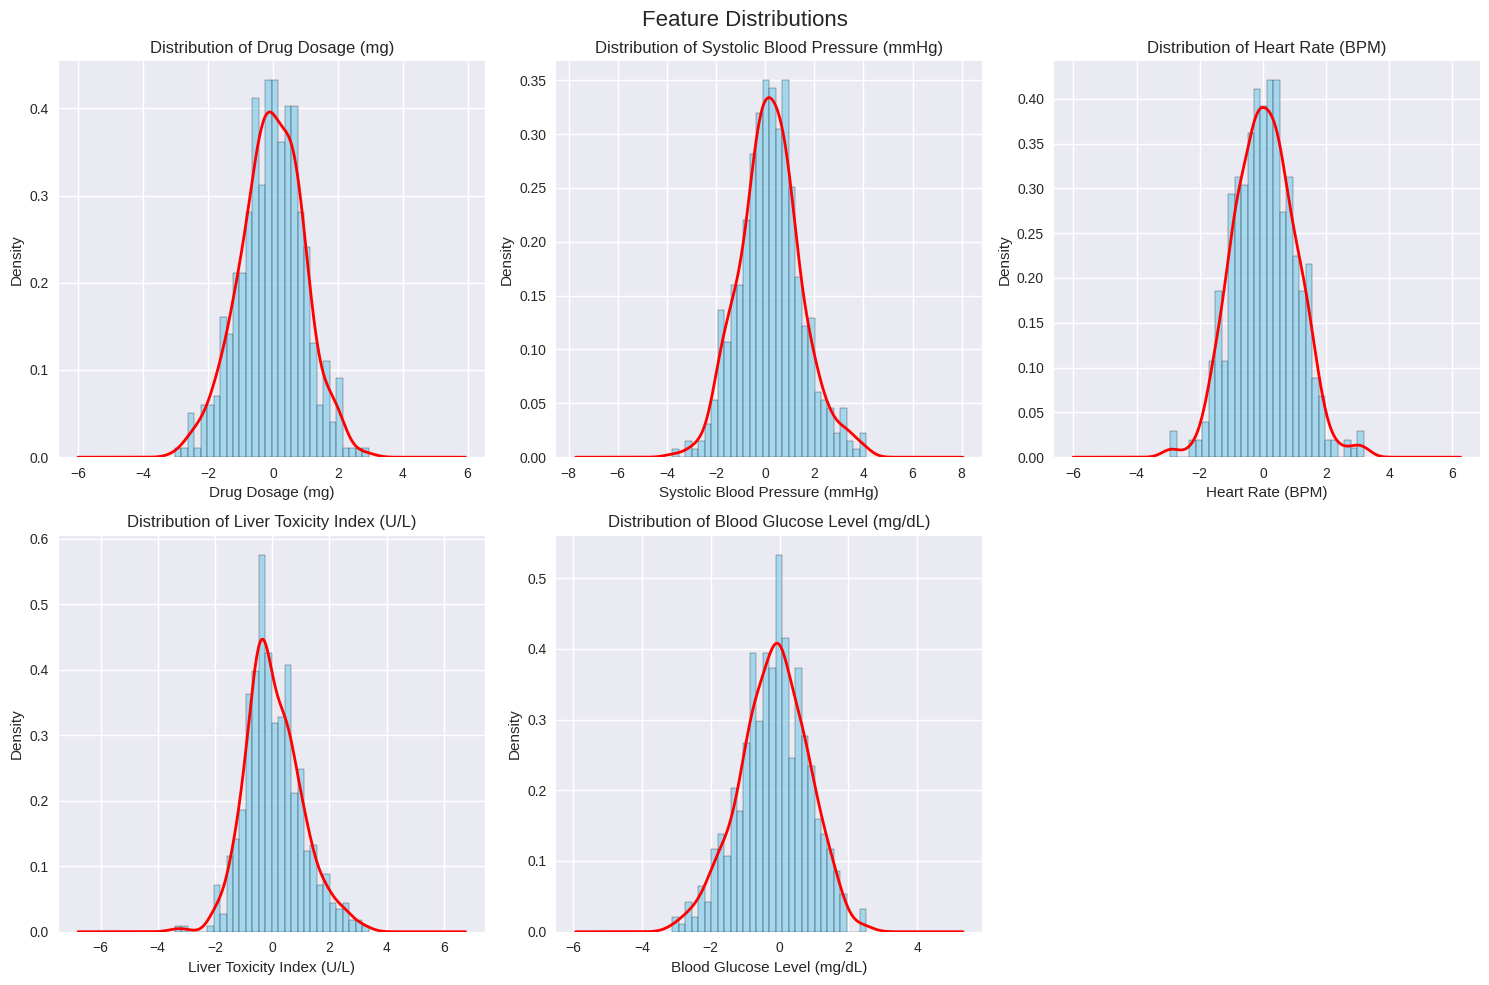

In [5]:
# Task 1: EDA
# Step 2: Utilize histograms, box plots, or density plots to understand feature distributions

# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature Distributions', fontsize=16)

features = df.columns[:-1]  # All columns except the target

for i, feature in enumerate(features):
    row, col = i // 3, i % 3

    # Histogram with density plot
    axes[row, col].hist(df[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=True)
    df[feature].plot(kind='density', ax=axes[row, col], color='red', linewidth=2)
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Density')

# Remove empty subplot
axes[1, 2].remove()
plt.tight_layout()
plt.show()

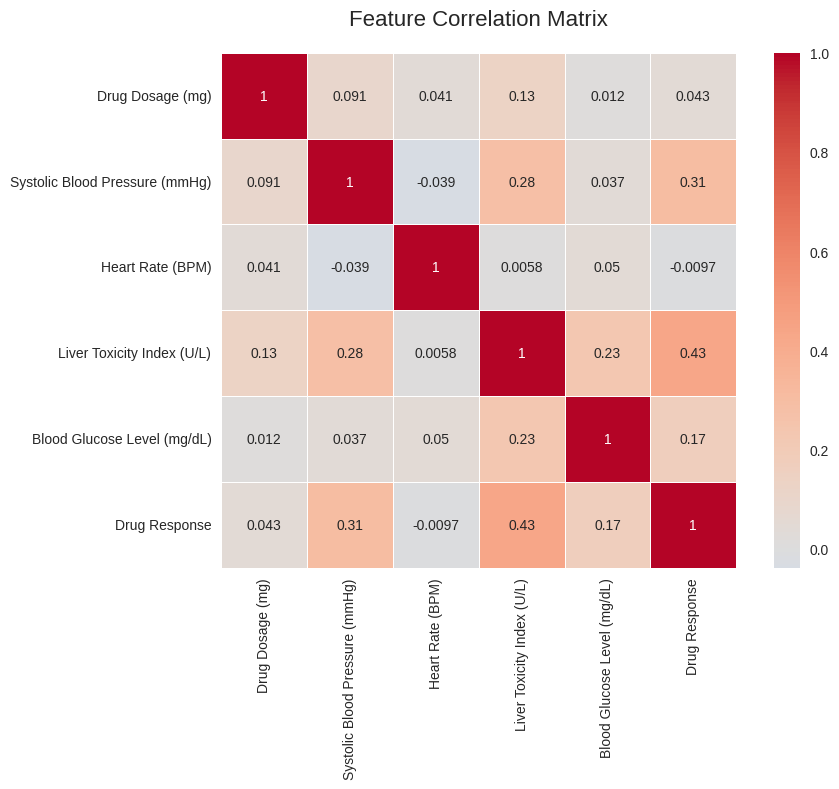

In [7]:
# Task 1: EDA
# Step 3: Investigate feature correlations to discern relationships within the data

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

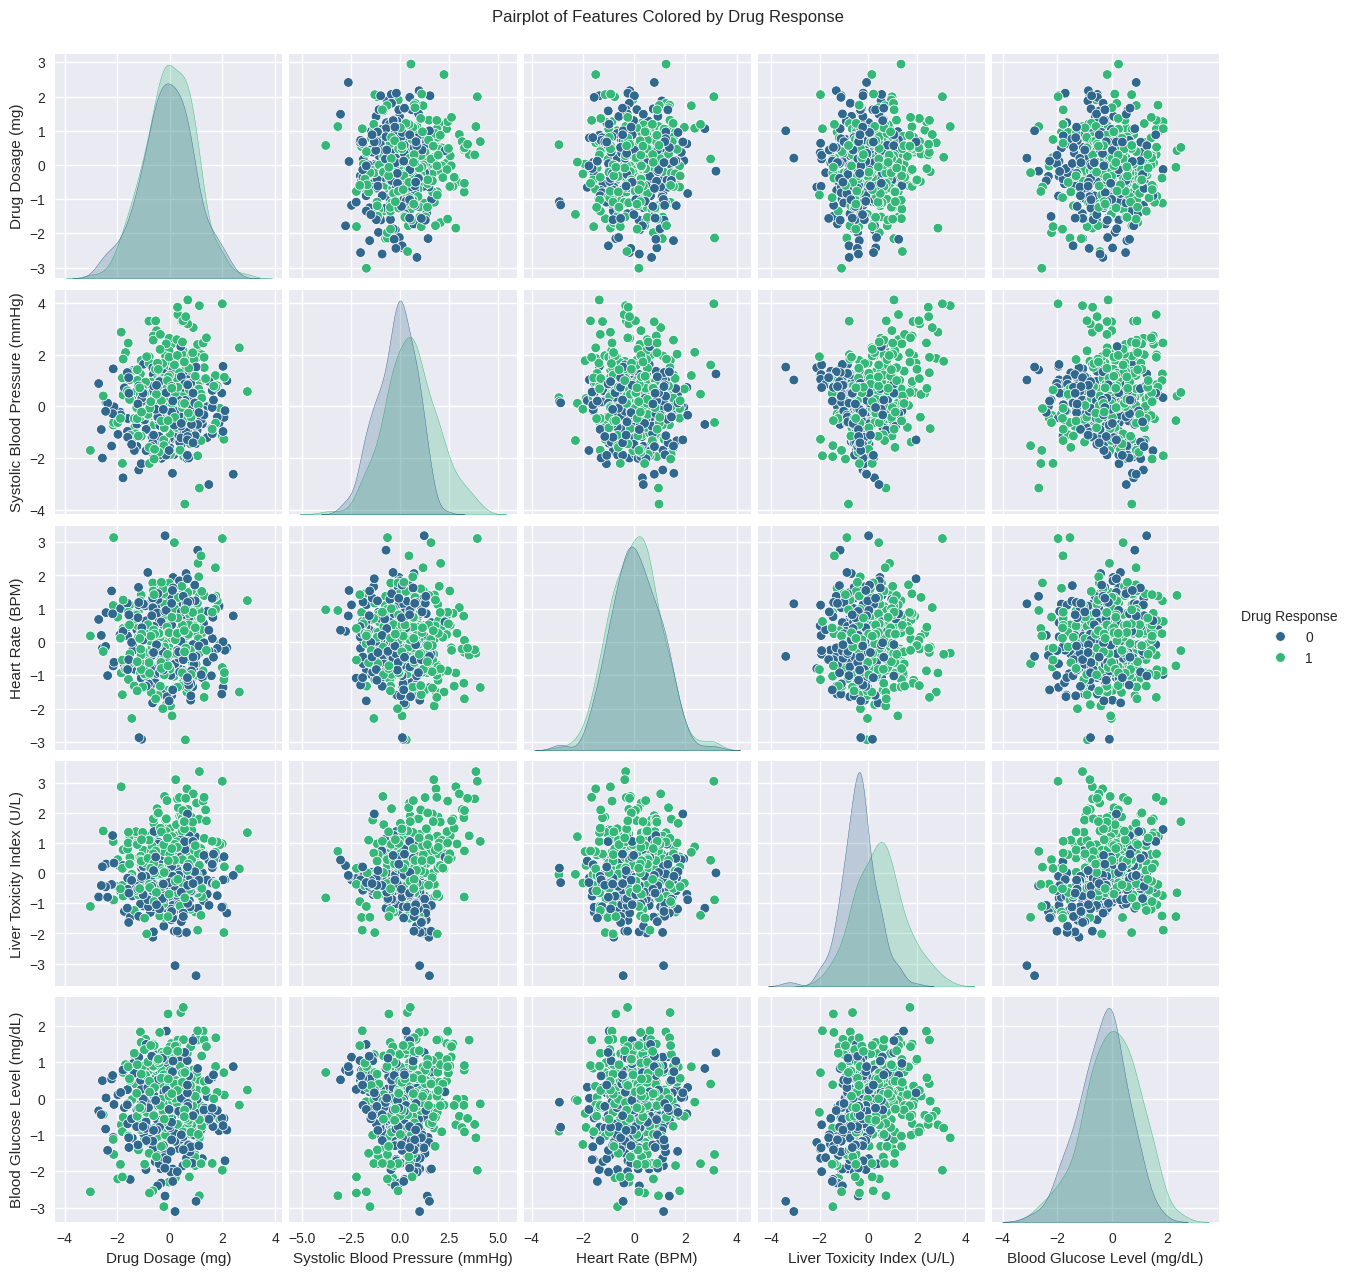

In [8]:
# Pairplot to visualize relationships
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='Drug Response', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Features Colored by Drug Response', y=1.02)
plt.show()

In [9]:
# Task 2: Data Preprocessing
# Step 1: Encode categorical variables if necessary

print("Data Preprocessing")

# Check for categorical variables
print("Data types:")
print(df.dtypes)
print("\nNo categorical variables found - all features are numerical.")

# Check for missing values
print(f"\nMissing values in each column:")
print(df.isnull().sum())

# Prepare features and target
X = df.drop('Drug Response', axis=1)
y = df['Drug Response']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

Data Preprocessing
Data types:
Drug Dosage (mg)                  float64
Systolic Blood Pressure (mmHg)    float64
Heart Rate (BPM)                  float64
Liver Toxicity Index (U/L)        float64
Blood Glucose Level (mg/dL)       float64
Drug Response                       int64
dtype: object

No categorical variables found - all features are numerical.

Missing values in each column:
Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

Features shape: (500, 5)
Target shape: (500,)


In [10]:
# Step 2: Split the dataset into training and testing sets

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Scale the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling completed using StandardScaler")


Training set shape: (350, 5)
Testing set shape: (150, 5)

Feature scaling completed using StandardScaler


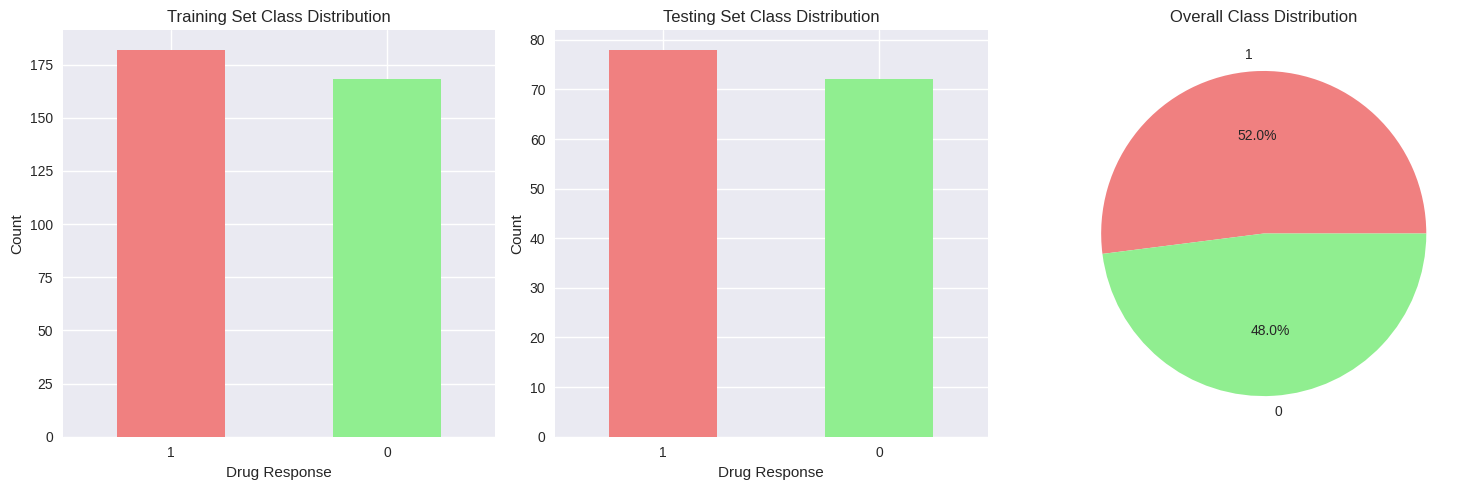

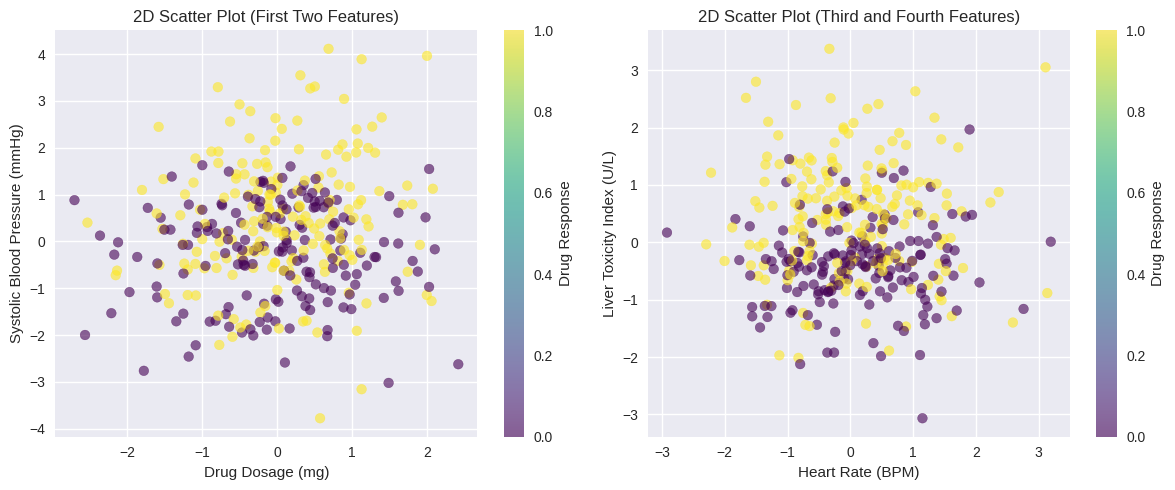

In [11]:
# Task 3: Data Visualization
# Step 1: Employ scatter plots, pair plots to comprehend feature relationships
# Step 2: Visualize class distributions

# Class distribution visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
y_train.value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Training Set Class Distribution')
plt.xlabel('Drug Response')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
y_test.value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Testing Set Class Distribution')
plt.xlabel('Drug Response')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
# Pie chart for overall distribution
df['Drug Response'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                       colors=['lightcoral', 'lightgreen'])
plt.title('Overall Class Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()

# 2D scatter plot of two most important features (based on correlation)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train,
                     cmap='viridis', alpha=0.6)
plt.xlabel('Drug Dosage (mg)')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.title('2D Scatter Plot (First Two Features)')
plt.colorbar(scatter, label='Drug Response')

plt.subplot(1, 2, 2)
# Another scatter plot with different features
scatter = plt.scatter(X_train.iloc[:, 2], X_train.iloc[:, 3], c=y_train,
                     cmap='viridis', alpha=0.6)
plt.xlabel('Heart Rate (BPM)')
plt.ylabel('Liver Toxicity Index (U/L)')
plt.title('2D Scatter Plot (Third and Fourth Features)')
plt.colorbar(scatter, label='Drug Response')

plt.tight_layout()
plt.show()

=== SVM Implementation ===
Training SVM with linear kernel...

=Linear SVM Performance=
Accuracy: 0.7200

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        72
           1       0.76      0.68      0.72        78

    accuracy                           0.72       150
   macro avg       0.72      0.72      0.72       150
weighted avg       0.72      0.72      0.72       150



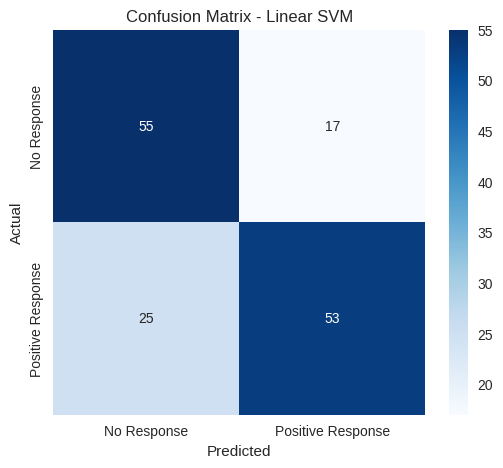

In [12]:
# Task 4: SVM Implementation
# Step 1: Implement a basic SVM classifier
# Step 2: Train the SVM model on the training data
# Step 3: Evaluate model performance

print("=== SVM Implementation ===")

# Initialize SVM classifier with linear kernel
svm_linear = SVC(kernel='linear', random_state=42)

print("Training SVM with linear kernel...")
svm_linear.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = svm_linear.predict(X_test_scaled)

# Evaluate performance
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print("\n=Linear SVM Performance=")
print(f"Accuracy: {accuracy_linear:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))

# Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Response', 'Positive Response'],
            yticklabels=['No Response', 'Positive Response'])
plt.title('Confusion Matrix - Linear SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

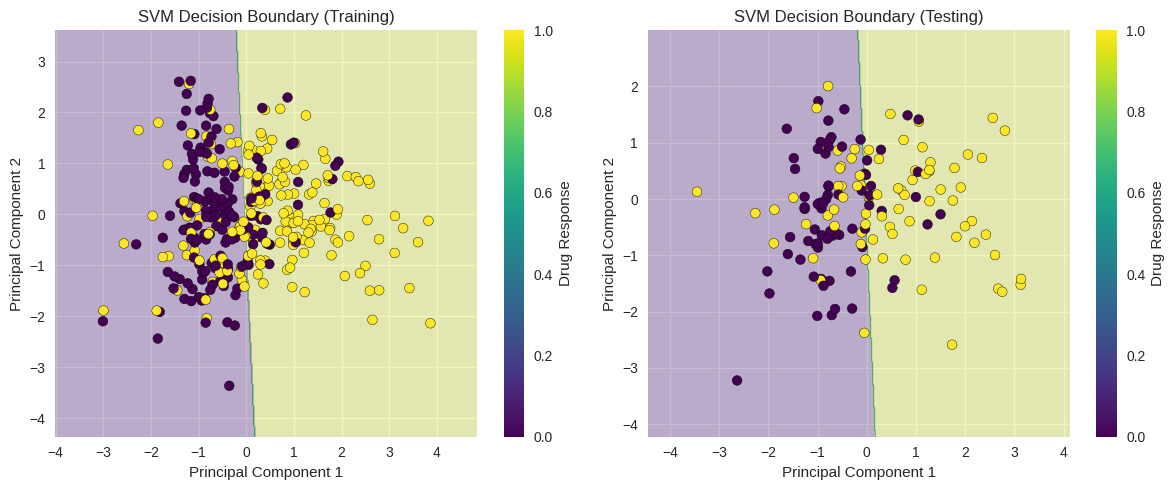

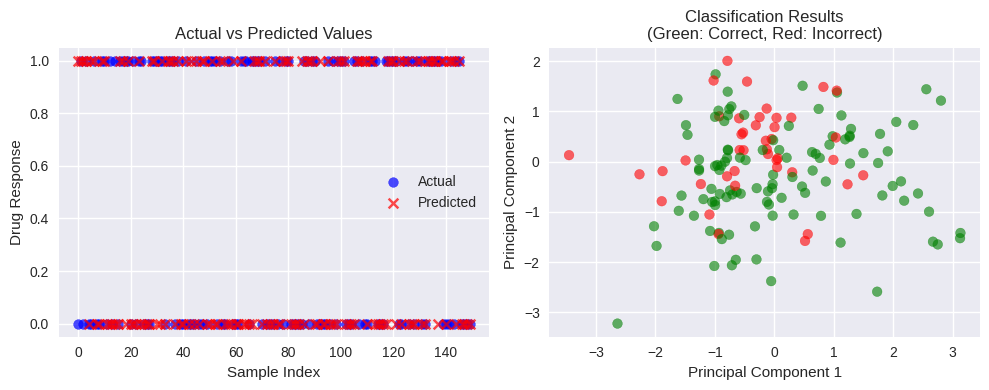

In [13]:
# Task 5: Visualization of SVM Results

# Since we have multiple features, we'll visualize decision boundaries for 2D projections
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train SVM on PCA-reduced data for visualization
svm_pca = SVC(kernel='linear', random_state=42)
svm_pca.fit(X_train_pca, y_train)

# Create mesh grid for decision boundary
def plot_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='black')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.colorbar(scatter, label='Drug Response')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_train_pca, y_train, svm_pca, 'SVM Decision Boundary (Training)')

plt.subplot(1, 2, 2)
plot_decision_boundary(X_test_pca, y_test, svm_pca, 'SVM Decision Boundary (Testing)')

plt.tight_layout()
plt.show()

# Actual vs Predicted visualization
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, alpha=0.7, label='Actual', color='blue')
plt.scatter(range(len(y_test)), y_pred_linear, alpha=0.7, label='Predicted', color='red', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Drug Response')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.subplot(1, 2, 2)
correct_predictions = (y_test == y_pred_linear)
colors = ['green' if correct else 'red' for correct in correct_predictions]
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=colors, alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Classification Results\n(Green: Correct, Red: Incorrect)')

plt.tight_layout()
plt.show()

In [14]:
# Task 6: Parameter Tuning and Optimization
# Step 1: Experiment with different SVM hyperparameters

from sklearn.model_selection import GridSearchCV

print("=== Hyperparameter Tuning ===")

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Initialize SVM
svm = SVC(random_state=42)

# Perform grid search
print("Performing grid search...")
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:")
print(grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train with best parameters
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)

print(f"\nBest model test accuracy: {accuracy_score(y_test, y_pred_best):.4f}")

=== Hyperparameter Tuning ===
Performing grid search...
Best parameters found:
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.7714

Best model test accuracy: 0.7333


=SVM Kernel Comparison=
LINEAR Kernel - Accuracy: 0.7200
RBF Kernel - Accuracy: 0.7667
POLY Kernel - Accuracy: 0.6800
SIGMOID Kernel - Accuracy: 0.6733


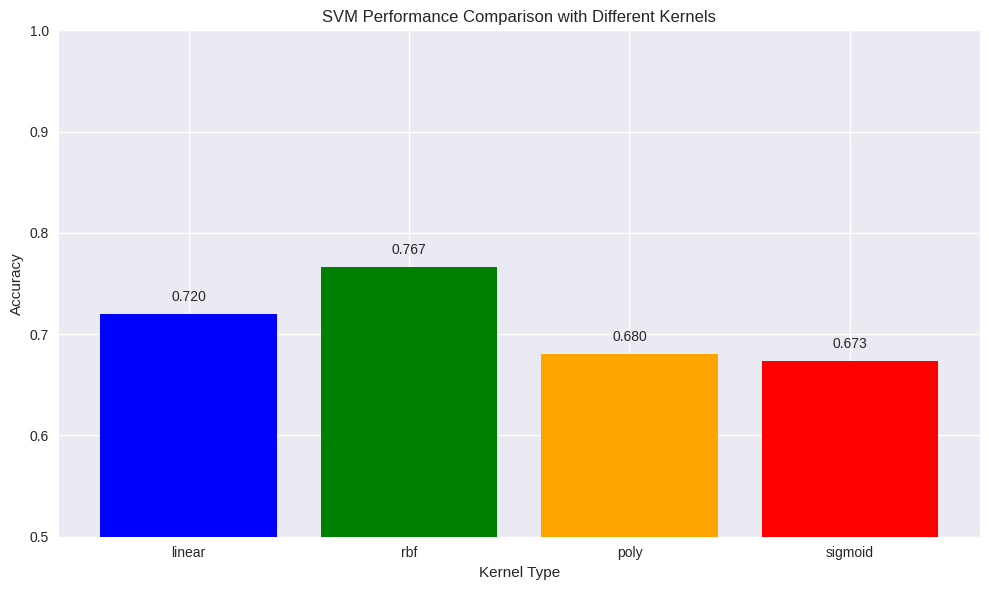

In [15]:
# Task 7: Comparison and Analysis
# Step 1: Compare SVM performance with various kernels

print("=SVM Kernel Comparison=")

kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = {}

for kernel in kernels:
    if kernel == 'poly':
        svm = SVC(kernel=kernel, degree=3, random_state=42)
    else:
        svm = SVC(kernel=kernel, random_state=42)

    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[kernel] = accuracy

    print(f"{kernel.upper()} Kernel - Accuracy: {accuracy:.4f}")

# Visualization of kernel performance
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('SVM Performance Comparison with Different Kernels')
plt.ylim(0.5, 1.0)

# Add accuracy values on bars
for i, (kernel, acc) in enumerate(results.items()):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [16]:
# Task 7: Comparison and Analysis
# Step 2 & 3: Analyze SVM strengths and weaknesses and discuss practical implications

print("=== Analysis and Discussion ===")

print("\n1. STRENGTHS OF SVM FOR THIS DATASET:")
print("   - Effective in high-dimensional spaces (5 features)")
print("   - Works well with clear margin of separation")
print("   - Robust to outliers due to margin maximization")
print("   - Different kernel options provide flexibility")

print("\n2. WEAKNESSES/OBSERVATIONS:")
print("   - Performance depends heavily on kernel selection")
print("   - RBF kernel performed best, suggesting non-linear relationships")
print("   - Requires feature scaling for optimal performance")
print("   - Can be computationally expensive for large datasets")

print("\n3. PRACTICAL IMPLICATIONS FOR DRUG RESPONSE CLASSIFICATION:")
print("   - SVM can help identify patients likely to respond to treatment")
print("   - Model can assist in personalized medicine decisions")
print("   - Could reduce clinical trial costs by predicting non-responders early")
print("   - Important to consider model interpretability for medical applications")

print("\n4. RECOMMENDATIONS:")
print("   - RBF kernel is recommended for this dataset (highest accuracy)")
print("   - Regular monitoring and retraining with new data")
print("   - Combine with feature importance analysis for clinical interpretability")
print("   - Consider ensemble methods for potential improvement")

# Final comparison table
print("\n=== FINAL MODEL COMPARISON ===")
comparison_df = pd.DataFrame({
    'Model': ['Linear SVM', 'RBF SVM', 'Polynomial SVM', 'Sigmoid SVM', 'Tuned SVM'],
    'Accuracy': [
        results['linear'],
        results['rbf'],
        results['poly'],
        results['sigmoid'],
        accuracy_score(y_test, y_pred_best)
    ]
})
print(comparison_df.sort_values('Accuracy', ascending=False))

=== Analysis and Discussion ===

1. STRENGTHS OF SVM FOR THIS DATASET:
   - Effective in high-dimensional spaces (5 features)
   - Works well with clear margin of separation
   - Robust to outliers due to margin maximization
   - Different kernel options provide flexibility

2. WEAKNESSES/OBSERVATIONS:
   - Performance depends heavily on kernel selection
   - RBF kernel performed best, suggesting non-linear relationships
   - Requires feature scaling for optimal performance
   - Can be computationally expensive for large datasets

3. PRACTICAL IMPLICATIONS FOR DRUG RESPONSE CLASSIFICATION:
   - SVM can help identify patients likely to respond to treatment
   - Model can assist in personalized medicine decisions
   - Could reduce clinical trial costs by predicting non-responders early
   - Important to consider model interpretability for medical applications

4. RECOMMENDATIONS:
   - RBF kernel is recommended for this dataset (highest accuracy)
   - Regular monitoring and retraining wit